In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [64]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [65]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

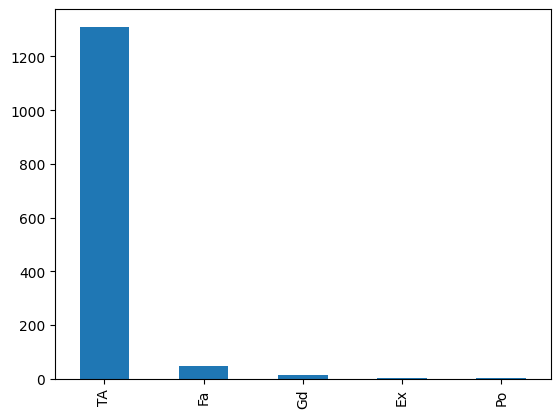

In [66]:
df['GarageQual'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'GarageQual')

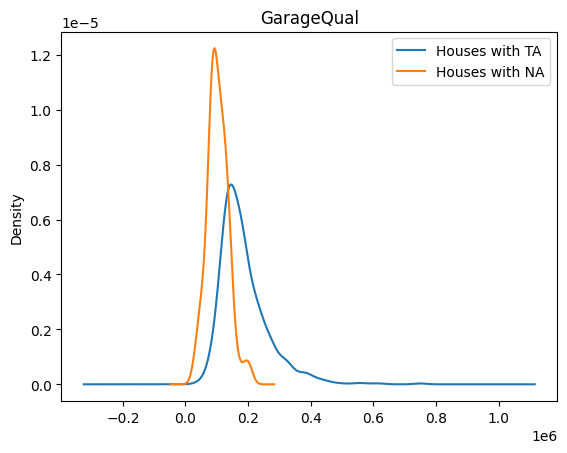

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax =ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', ax =ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']

ax.legend(lines, labels, loc = 'best')
plt.title('GarageQual')



In [68]:
temp = df[df['GarageQual'] == 'TA']['SalePrice'] 

In [69]:
df['GarageQual'].fillna('TA', inplace  =True)

<AxesSubplot:>

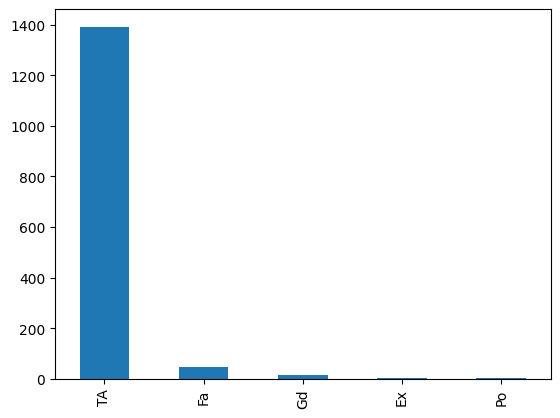

In [70]:
df['GarageQual'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'GarageQual')

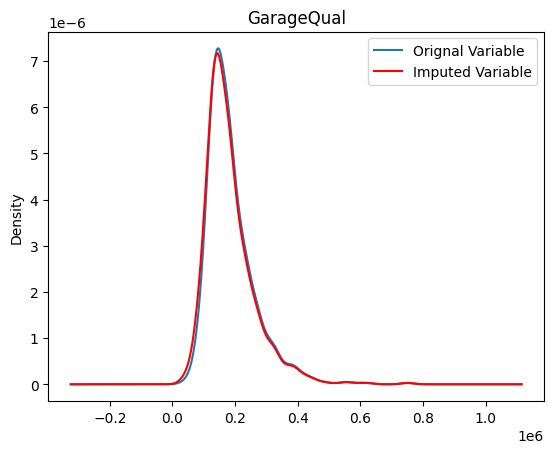

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde', ax = ax)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax =ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Orignal Variable', 'Imputed Variable']

ax.legend(lines, labels, loc = 'best')
plt.title('GarageQual')

<AxesSubplot:>

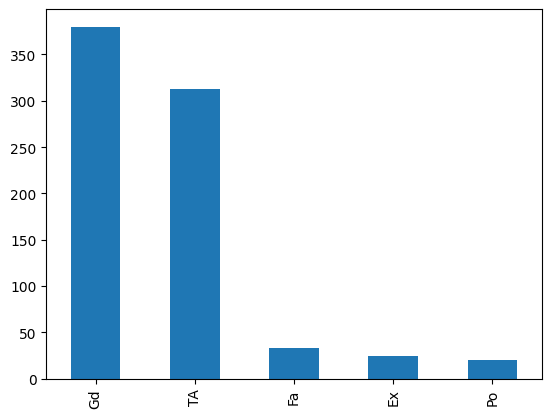

In [72]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

In [73]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

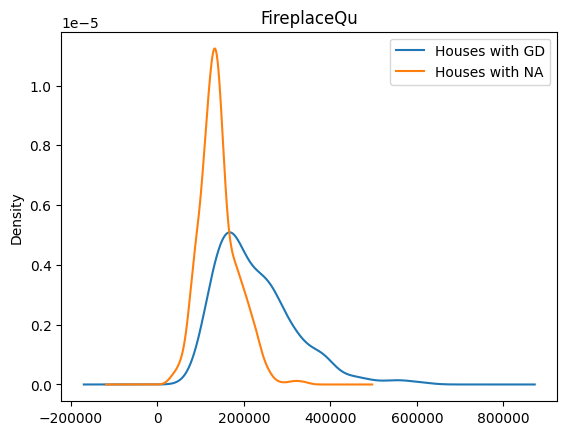

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', ax =ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde', ax =ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with GD', 'Houses with NA']

ax.legend(lines, labels, loc = 'best')
plt.title('FireplaceQu')

In [75]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [76]:
df['FireplaceQu'].fillna('Gd', inplace = True)

<AxesSubplot:>

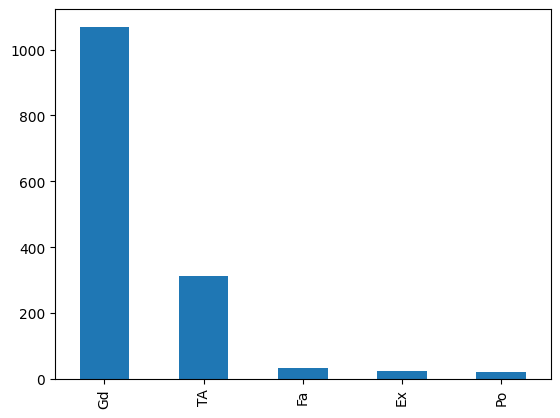

In [77]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'FireplaceQu')

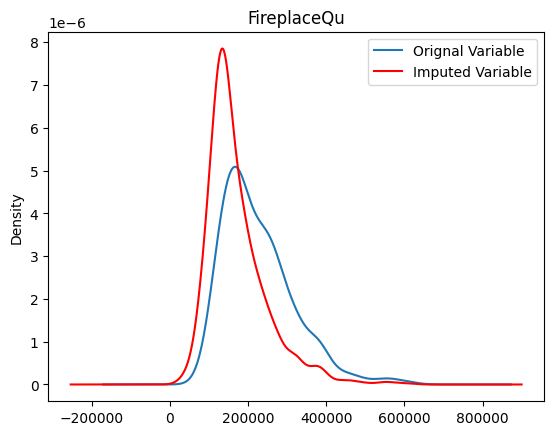

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde', ax =ax)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', ax =ax, color = 'red')


lines, labels = ax.get_legend_handles_labels()
labels = ['Orignal Variable', 'Imputed Variable']

ax.legend(lines, labels, loc = 'best')
plt.title('FireplaceQu')

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2)

In [81]:
imputer = SimpleImputer(strategy='most_frequent')

In [83]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [84]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)